# Chapter 3: Building and Solving Dynamical Models
Introduction to the Phys212/Biol212 class
### by Ilya Nemenman, 2016-2020

In this module, we further expand on our toolkit of computational methods and Python coding and learn how to solve dynamical (ordinary differential equations) models. Make sure you read Chapters 4.3 and 6.1, 6.3, 6.4, 6.7.4, 6.8.3,  6.9 of the *Student Guide* alongside with this notebook.

## The simplest dynamical model: Malthusian growth
Let's start with the following problem and figure out how to model it:

> A few bacteria are placed in a Petri dish. With time, each bacterium grows with a certain rate and then divides into two daughter cells. How many bacteria are there in the dish a certain while later?

### Analysis
How should we model this? The model we need is definitely dynamic. However, almost all other aspects of the model are for you to decide. I encourage you to consider different modeling assumptions. 

We can have discrete number of bacteria vs. continuous (discrete vs. continuous state model. Nominally, bacterial number should be viewed as discrete -- after all, we cannot have a fractional number of cells alive in the population. However, when the number is huge (see more on this), then populations of many millions or many millions and one bacteria are indistinguishable, and one can take the number as continuous. Even simpler, we can consider not the number of bacteria, but the bacterial *density* -- how many bacteria are there per unit volume. This number certainly can be continuous, as we are not guaranteed that the unit volume we choose will have a whole number of bacteria on average. For the rest of this module, we will choose to measure bacterial densities instead of numbers, and hence the *dynamical variable* is *continuous*.

We can model this problem in discrete time (bacteria divide synchronously) or continuous time -- bacteria divide at different times. Think about which (if any) is a better choice and why and when? My choice here is *continuous time*.  We can model this process as a stochastic model (the number of dividing bacteria is random) or a deterministic model, where in a certain interval $dt$ a certain fraction of bacteria divides that is proportional to the duration of the interval. In what follows, I choose to assume that each bacterium divides at the same rate. But they divide in different time, so that the time is *continuous*. Finally, we will assume that the number of bacteria is large, so that a large number of new bacteria gets created during any, even very short, period of time. Thus the total number of bacteria dividing per unit time is proportional to the current population, with a certain coefficient of proportionality, which we call the rate. 

To substantiate the assumption of a large number of bacteria, let's do a simple analysis. A typical bacterium, such as *E. coli* has the linear size of about 1 micron, or $10^{-6}$ m (in reality, the bacterium is a rod, but for our purposes this is not important), which corresponds to the bacterial volume of $10^{-18}$ m$^3$. Thus in a milliliter of a solution ($10^{-6}$ m$^3$), one should be able to fit about $10^{12}$ bacteria if they occupy all of the space. In reality, packing them so closely is hardly possible, and the volumes can be slightly larger than the micron cubed. So $10^{11}$ bacteria per milliliter is a bit more realistic. At this point, we won't have a solution with bacteria -- the bacterial instead will form a hard mat. For liquid cultures, the maximum concentrations are typically 10 to 100 times smaller than this maximum, at least. Which is still a huge number, so that stochastic effects probably average out quite well and can be neglected. 

### Model building
The following variables are needed to initialize the model: initial density of bacteria (constant), growth rate (constant), and total duration of the experiment (constant, which we denote as $T$). Then the number of bacteria is the dependent variable, which will be updated with time. At this point, we also need to think about what the units of the variables are. We choose to measure the duration of the experiments in hours, then the growth rate is in 1/hour. The units for bacterial densities are a bit more complicated. Experimentally, we do not usually measure the bacterial numbers, but rather something called *Colony Forming Units*, or CFUs. The CFUs are measured by taking the bacterial culture, diluting it, and putting it into a new dish, so that, in this dilute solution, every bacterium in far away from each other. Some bacteria start growing, and form distinct colonies, and then we count those as the CFUs. Typically, the number of bacteria in a culture is proportional to CFUs (with some noise, of course), and the two are often used interchangeably. Thus our units for bacterial density will be in units of CFU/mL, and I choose the units such that the density 1.0 corresponds to $10^6$ CFU/mL. 

The considerations above suggest that we can write the model using a differential equation for the population density $$\frac{dn}{dt}=rn,$$ with the initial condition $n(0)=n_0$. This assumes that the number of bacteria is always much larger than 1 (otherwise stochasticity will be important). This model is easy to solve analytically. We rewrite the equation as $$dn=rn\, dt,$$ and integrate both sides, making sure that the limits match: we go from $n(0)$ bacteria at time 0 to $n(T)$ at time $T$:
$$ \int_{n_0}^{n(T)}\frac{dn}{n}=\int_0^T r\,dt.$$
This gives $$n(t)=n_0 e^{rt},$$ which is the celebrated Malthusian exponential growth. <font color=pink>Need editorializing about how this was one of the first quantitative biological models.</font> However, our focus here is on solving similar equations numerically, and so we will implement numerical solution of the equation, and the analytical solution will be a useful check of accuracy of our numerical one.

### Model implementation
We need to solve the differential equation that we write down, but we do not know how to do this yet. So in the next section we introduce a method for doing so.

## Simplest integrator of an ordinary differential equation: the Euler integration method
The problem above is the first problem of a different kind: dynamic, continuous time model, where temporal evolution of variables is governed by ordinary differential equations (in this case, there's just one variable and one equation describing it). Intuitively, solving such models should be easy -- instead of a continuous change of the variable, we can increment the changing variable in steps corresponding to quantum units of time. To understand what the increment should be, one recalls that the derivative is the tangent to a function, and so one can approximate the change of the function $n(t)$ over the time $\Delta t$ by $\frac{dn}{dt}\Delta t$. In other words, we can rewrite the differential equation as a *finite difference* equation 
$$n(t+\Delta t)=n(t)+\Delta n(t)=n(t)+rn(t)\Delta t.$$ 

One then can solve for $n$ over the entire range of time that we are interested in by looping over a few simple commands: evaluating the derivative, calculating the function increment as the derivative times the time step, incrementing the function, and advancing the time. This is known as the *Euler algorithm( for solving differential equations. More precisely, notice that here we replaced the derivative at time $t$ by the difference of functions now (at $t$) and in the future ($t+\Delta t$). That is, we are using the *forward finite difference*, so that this algorithm is known as the *forward Euler algorithm*. 

We equivalently could have said that $\left.\frac{dn}{dt}\right|_t = \lim_{\Delta t\to 0}\frac{n(t)-n(t-\Delta t)}{\Delta t}$ or  $\left.\frac{dn}{dt}\right|_t = \lim_{\Delta t\to 0}\frac{n(t+\Delta t/2)-n(t-\Delta t/2)}{\Delta t}$ -- in other words, using *backward* or *central* finite differences. This would result in a different form of the Euler algorithm. Note, however, that all physical systems that we study are *causal* -- the state of the system in the future depends on its state now, and not the other way around. This makes the choice of the forward Euler method over other possible choices easy.  

This analysis tells us that two more variables will be needed for implementation of the problem solution using the Euler method: $dn$ -- a dependent variable that will store the change of the number of bacteria on a dish at a given time, and $dt$, which is a constant determining the step size for the solution of the differential equation. Note that the variable $n$ in this case is something that we call a *container* variable -- it accumulates $dn$, so that it is a dependent variable that depends not just on the current rate of growth, but on the rate of growth at all moments previously.

### Simple implementation of the Euler method
We can implement the model in the following simple code:

In [1]:
import numpy as np          # importing numpy
SimulationTime = 1.0        # duration of the experiment, hours
dt = 0.1                    # time step, hours
GrowthRate = 1.0            # growth rate of the population, hrs^{-1}
Population0 = 1.0           # initial population size, 10^6 Colony Forming Units (CFU)

Population = Population0    # setting the initial value
# for every time point in a range (0,T], with a step dt, we perform the Euler step
for Time in np.arange(dt, SimulationTime+dt, dt):
    Population = Population + dt * GrowthRate * Population
    # and we print the current value of n(t)
    print('Time = ' + str(Time) + '; Population = ' + str(Population) + '.')

Time = 0.1; Population = 1.1.
Time = 0.2; Population = 1.2100000000000002.
Time = 0.30000000000000004; Population = 1.3310000000000002.
Time = 0.4; Population = 1.4641000000000002.
Time = 0.5; Population = 1.61051.
Time = 0.6; Population = 1.7715610000000002.
Time = 0.7000000000000001; Population = 1.9487171.
Time = 0.8; Population = 2.1435888100000002.
Time = 0.9; Population = 2.357947691.
Time = 1.0; Population = 2.5937424601.


Note that our time range starts with `dt` and ends with `SimulationTime+dt`. This is because we already know what the population is at zero time, so it does not need to be calculated. And since Python ends the range *before* the last value of the range, we need to extra an extra time step, an extra `dt`, to actually include the time `SimulationTime` in the simulation.

How accurate is the solution that we obtain? We know that the solution should be $n(T)= n_0 e^{rT}$, so let's print this value for comparison:

In [2]:
print('True population should have been ' +str(Population0*np.exp(GrowthRate*SimulationTime))+'.')

True population should have been 2.718281828459045.


Specifically, if $\Delta T= 0.1$, the error is about $\approx 0.13$ -- not too small. In the next few lectures, we will explore how the error depends on $\Delta T$ numerically. For now, let's do a back of the envelope analysis. The true Taylor expansion of a function reads $n(t+\Delta t)=n(t)+ \frac{dn}{dt}\Delta t +\frac{1}{2}\frac{d^2n}{dt^2}\Delta t^2+\dots$. The Euler method truncates this series after the term $O(\Delta t)$ (recall that the mathematical notation O means "of order of"). So every step in the iteration introduces the error of the magnitude $O(\Delta t^2)$. And there are $T/\Delta t$ such steps, os that we expect the overall error to be $O(\Delta t^2)\times T/dt =O(T\,\Delta t)$. In other words, the error will grow with the temporal duration of the interval we are analyzing, and it will decrease linearly with $\Delta t$, when the finite difference starts looking close to the derivative. Because of this linear dependence on $\Delta t$, the Euler method is known as a *first order* integration algorithm.

### Plotting
Read the textbook, Chapter 6, for the basics of plotting. We can restructure our code to output the entire temporal evolution -- not just the final result -- of the bacterial number, and then we can plot the result. This is especially useful for visualization. We will discuss the plotting commands more during the class. Further, in the code below I mark some of the commands that I would like you to modify and/or remove -- and to explore the effects that this has on the output.

The most important thing to remember about plotting is that, like everything else in Python, a figure is an object. The axes in a figure are an object, the plots, labels, lines, tick marks are all objects, and they are all related to each other: that is, labels objects are children of the axes objects, and so on You can explore every one of this objects by doing a `dir` on it, and seeing which methods are available. A figure as an object, and a figure as a raster of pixels are not the same thing. Showing a figure -- that is, creating a raster corresponding to its current state -- is done by `plt.show()`. The raster than is displayed and is frozen -- if you change the figure beyong that, the raster won't change. You will need to show the figure again to see an updated raster.

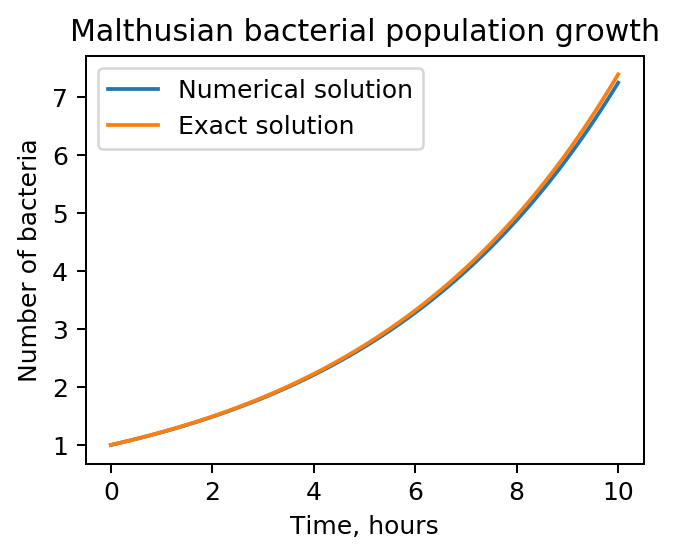

In [3]:
import numpy as np              # importing numpy
import matplotlib.pyplot as plt # importing plotting functions
from matplotlib import rc       # importing functions for plot control


# needed to switch to inline plots in Jupyter
# REMOVE this line and observe the effect this has
%matplotlib inline      

SimulationTime = 10.0      # simulated experiment duration, hours
dt = 0.1                   # time step, hours
GrowthRate = 0.2           # growth rate, hours^{-1}
Time = np.arange(0, SimulationTime+dt, dt) # all time points in the simulation, hrs
Population = np.zeros(Time.size) # population at the above time points, hrs
Population[0] = 1.0        # initial population size, 10^6 CFUs

# for each time point, do the Euler step
for i in np.arange(1, Time.size):
    Population[i] = Population[i-1] + dt * GrowthRate * Population[i-1]

# exact population value for comparison
PopulationExact = Population[0] * np.exp(Time*GrowthRate)

# The next line changes the figure size. There are many ways of doing this, but the easiest 
# I found is to treat the whole axes as a single subplot, and then change the subplot size,
# in inches. 
# REMOVE or MODIFY the next line and explore the effects this has.
fig, ax = plt.subplots(figsize=(4, 3), dpi= 180, facecolor='w', edgecolor='k')

# plotting numerical and exact solution, with labels 
plt.plot(Time, Population, label='Numerical solution')
plt.plot(Time, PopulationExact, label='Exact solution')

#showing the legend
plt.legend()

# there are alternative ways for labeling; using get_lines() and setting line
# labels, or using ax.legend()

# labeling the axes in two different ways 
plt.title('Malthusian bacterial population growth')
plt.xlabel('Time, hours')
# an alternative way of changing things is to change attributes directly
ax = plt.gca()
ax.set_ylabel('Number of bacteria')

# finally, showing the plot
plt.show()


Note that, even though the lines in this figure look continuous, they are, in fact, linear segements connecting points specified by `Time[i]` and `Population[i]`. You can verify this easily by changing `dt` to a larger value and observing how the curves break.

> ### Your turn 3.1
Explore the objects involved in plotting by using `dir` and then calling various methods associated with the objects. Change the font of the x-lable of the Malthusian growth figure above, and change color and the linetype of the exact solution line, and then re-render the figure. Note that I am not asking you to create a new figure with different properties, but to find methods to change properties of the current figure.

> ### Your turn 3.2
Explore how the solution depends on $dt$: is the Euler method really a first order method? For this, evaluate the solution at different $dt$ for the final time of $t=1$, initial condition $n_0=1$, and growth rate of 1. The final result should be the value of $e$, or `np.exp(1)`. Explore the difference between the analytical solution and the numerical result for different $dt$. Plot the dependence of the final error on $dt$. Plot this dependence in the log-log coordinates.


## Continuing with the model

### Model verification
We can solve this whole problem analytically and compare to the output of the experiment. Or we can verify the code by comparing to special cases. For example, for zero growth rate, the number of bacteria shouldn't change with time. Alternatively, when $n_0$ increases by a factor, the final result should increase by the same factor -- and we can check this.

### Discussion
We have modeled the exponential bacterial growth, and the findings agree with the analytics. While it seems that there is not much to discuss here, one could still describe what will happen to the solution if any of our assumptions (large number of bacteria, deterministic growth, continuous time, etc.) are violated. Please think of answers to these questions. For example, how would this code change if we assumed the model to be a discrete time model? In fact, only the steps would probably get larger -- but the structure of the code would remain the same, with the same stepping through time intervals of $dt$. There are no, in fact, purely continuous models on digital computers!

## New Python concepts: Encapuslation, Scopes, and Functions
To date, we often used Python from the command line, or executed cells from Jupyter notebooks. While this is allowed, it is not the best way of working with Python (or most other software packages), epsecially when the programs you write become longer. It is important to encapsulate the code that you use repeatedly into either a script or a function, thus assigning the piece of code a name, and being able to call it and execute it by this name. 

The difference between the scripts and the functions is that a script does not have its own scope, and hence it modifies the state of the Python kernel after the execution. Functions have their own scope and usually (bot not always) do not modify the state of the kernel. Please read Appendix E.4. of the *Python Student Guide* for a more in-depth discussion about scopes. Additionally, you can pass arguments to a function and receive output back, and this is impossible to do with scripts. In general, functions are probably preferable in all, but a few special cases. This is especially true when working with Jupyter notebooks, where you can define a function in a cell, and then, having executed the cell, you can refer to the function by the name from any other cell of the notebook.

Whether you choose functions or scripts, it is crucial that you should follow the rule: if a code can be reused more than once, or if it may be re-used for different parameter values, then it should be encapsulated. 

### Functions
Section 6.1 in the *Python Student Guide* focuses on writing one's own functions. In this lecture, we will write our first functions as well -- various growth rates for bacterial growth problems and solvers of the corresponding differential equations. I will leave it for you to read the appropriate discussion in the textbook, and we will not duplicate it here. Just as a reminder of a few key points:
1. Functions have arguments. Unlike in many other languages, Python has an ability to use *keyword* arguments, so that you can supply arguments to a function in any order, as long as you name them. There's also a mechanism for default argument values, so that you can skip providing an argument if you don't have to. Both of these mechanisms speed things up when writing your code, but they also can make your code harder to understand.
2. Functions return values -- think of them as mathematical functions, which map their input arguments into the output arguments. However, unlike mathematical functions, a Python function can return many argumentts together, assmebled in one list.
3. The most important distinction between mathematical functions and Python functions is that functions in Python can change the state of the Python interpreter. That is, if an argument to a function is a mutable object, then the obect can be changed from inside the function. Just imagine if you were to write $x=\pi$, $y=\sin(x)$ in a trigonometry class, and, in a process of the evaluation, $y$ gets assigned its appropriate value of 0, but $x$ changes during that process too, and, after the execution, it becomes equal to, say 1.2. You can do this in Python! But you definitely should think very hard before doing this. It may save you a bit of writing time, but I assure you that making your code to behave in a way that people don't expect it to will cause many problems.

This last point is worth reiterating. Many things, including writing code, we can do in many different ways, and there are no laws of nature that prefer one way over the other. What does make a difference is what people working with you (and you yourself) expect. You want to write code that is easy to understand, that can be read by people filling in gaps without actually exploring every line of your code. The expectations change depending on the field -- and you need to know what expectations are in yours. My favorite example is the following. Say, we define a function $f$ as $f(x,y)=x^2+y^2$. What is then $f(r,\theta)$? A mathematician or a computer scientist would say that $f(r,\theta)=r^2+\theta^2$, but a physicist would definitely respond that $f(r,\theta)=r^2$, because, for us, there are conventions that $x,y$ are Cartesian coordinates, and $r,\theta$ denote the radius and the polar angle. So know your audience! In a computer science class, it may be ok for a function to change its arguments, or otherwise modify Python state. In a science class, it is a bad idea.

While we are at it, discussing various things that are idyosyncratic to Python, you would be wise to remind yourself the following concept (go back to prior sections in the *Student Guide* or Google):
1. What is a *type* of a variable? When should we do tyope checing? How does Python figure out which type the variable passed to a function has. 
2. What are modules? And how does `reload` function work?
3. Finally, remind yourself about the importance of vectorizing your code.

Let's now write a few functions we will be using. We will start with defining the growth rate for the Malthusian growth as a function.

In [4]:
print(dt) 

def Malthus(Population):
    """
    This function returns the growth rate of a simple exponential growth

    Usage: Growth = Malthus(Population)

        Population -- current population size, in A.U
        
        Growth -- population growth, 1/hr
    """
    GrowthRate = 1.0         # growth rate per bacterium, 1/hrs
    return GrowthRate*Population

0.1


Pay attention to the first line above `print(dt)`. While `dt` is not defined in this cell, it has been defined earlier, and is accessible here as well. Also this should tell you that cells defining functions are not special in any way. They are just code cell, and defining a function is a code -- it's just a special code that doesn't actually output anything, but only creates an object -- the function -- in the Python state space.

>### Your turn 3.3
In the code above, what does the `"""` syntaxis stand for?

Now we notice that the function has an internal parameter, the `GrowthRate`. Sometimes it would be useful to be able to evaluate the function for different values of the parameter, without having to rewrite it. For this, we can define the following function. Note that we are not using one of the arguments, `t` -- it will become clear later why.

In [5]:
def MalthusParam(Population, t=0.0, GrowthRate=3.0):
    """
    This function returns the growth rate of a simple exponential growth

    Usafe: Growth = Malthus(Population,GrowthRate)

        Population -- current population size
        t -- current time (not used)
        GrowthRate -- population Growth Rate, 1/(bacterium*hr)
        
        Growth - population growth, 1/hr
    """
    return GrowthRate*Population

Now we come to our old friend, the scope. You should read Appendix E4 of the *Student Guide* at this point. Not that we have the variable `GrowthRate` dfined in the global scope, and inside the `MalthusParam()` scope as well. Thus when line 12 above tries to access `GrowthRate`, it access the one inside the lost local scope first. Overall, Python searches for variables first in the Local scope, then in Enclosing, the Enclosing of Enclosing, etc., eventualy checking the Global scope, and then the Built-in variables. Let's do a few calls to `MalthusParam` to demonstrate it.

In [6]:
print('Global GrowthRate = '+str(GrowthRate)+ '.')
print(MalthusParam(2.0))  # calling the function with the default parameter of 3.0
print(MalthusParam(2.0, 0.0, 7.0)) # calling the function with GrowthRate 7.0
print(MalthusParam(GrowthRate=2.0, t=0.0, Population=7.0)) # flipping the order of the parameters

Global GrowthRate = 0.2.
6.0
14.0
14.0


Make sure you are able to understand the results of the previous cell. Even though the global variable `GrowthRate` is 0.2, the values that were used in calculating the output of the `MalthusParam()` function are all different from that.

### Growth with carrying capacity
Let's now move to slightly more complicated growth functions, and get some more practice with writing functions. Clearly, bacteria in a dish cannot grow exponentially all the time -- they are limited by the amount of food, by the dish size, and so on. The easiest way to account for this is introducing the concept of $C$, the *carrying capacity* -- basically, limiting the growth by some fixed value. That is, instead of being proportional to the population size, the rate of growth of the population is $r(n) = r_0n\left(1-\frac{n}{C}\right)$. As you can eagerly see, when $n\to C$, growth slows down, becomes zero, and then turns negative if $n>C$, indicating that bacteria will die if there are too many of them.

We will use this type of growth functions many times throughout this class. Let's now code it up.

In [7]:
def MalthusCapacity(Population):
    """
    This function returns the growth rate of a simple exponential growth
    with carrying capacity
    
    Usage: Growth = Malthus(Population)

        Population -- current population size, in A.U
        
        Growth -- population growth, 1/hr
    """
    GrowthRate = 1.0             # max growth rate per bacterium, 1/(bacterium*hr)
    CarryingCapacity = 10        # carrying capacity, A.U.
    return GrowthRate*Population*(1-Population/CarryingCapacity)


def MalthusCapacityParam(Population, t, GrowthRate, CarryingCapacity):
    """
    This function returns the growth rate of a simple exponential growth
    with carrying capacity
    Usage: Growth = Malthus(Population)

        Population -- current population size, in A.U
        t -- current time (not used)
        GrowthRate -- maximum growth rate per bacterium, 1/(bacterium*hr)
        CarryingCapacity --  # carrying capacity, A.U.
        
        Growth -- population growth, 1/hr
    """
    return GrowthRate*Population*(1-Population/CarryingCapacity)

>### Your turn 3.4
Plot the function MalthusCapacityParams() from the notebook for your choice of parameters and range of the population sizes. Make sure your plots have axis labels, titles, and legends.

>### Your turn 3.5
Using the code we wrote for the previous module, write a *function* that solves a quadratic equation, receiving the three coefficients of the quadratic polynomial as arguments, and returning the two roots. 

### Functions with arguments as functions: Euler integrator
We are now at a point, where we can write the Euler solver as a function, which will take as an argument *the name of the function that must be integrated*. This is interesting -- an entire function can be an argument to another function in Python.


In [8]:
def Euler(xPrime, t0=0.0, x0=0.0, T=1.0, dt=0.1):
    """
    Solves one variable ODE using the Euler method.
    Usage:
        (t,x) = Euler(xPrime,t0=0.0,x0=0.0,T=1.0,dt=0.1):
        
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated
        t0 -- starting time (default 0.0)
        x0 -- intitial condition for x (default 0.0)
        T -- ending time (default 1.0)
        dt -- time step (default 0.1)
        
        result -- arrays of time and the corresponding solution of the ODE 
    """
    t = np.arange(t0, T+dt, dt)    # initialize the array of time points. Why do we go to T+dt? Explain!
    x = np.zeros(t.size)           # initiatize the array of results at those time points
    x[0] = x0                      # set the initial conditions
    for i in range(1, t.size):     # Loop over all time points
        x[i] = x[i-1] + dt * xPrime(x[i-1]) # forward Euler step

    return (t, x)

Now we can solve the Malthusian growth equation with and without the carrying capacity using the newly written growth and the Euler integrator functions.

In [9]:
SimulationTime = 1.0 # time to solve for
P0 = 1.0             # initial population size
dt = 0.1             # time step 

t, P = Euler(Malthus, 0.0, P0, SimulationTime, dt) # solve the equation

# and now the same for carrying capacity. Notice how only the function name changes:
t, Pc = Euler(MalthusCapacity, 0.0, P0, SimulationTime, dt) # solve the equation

print('Time; Population -- Without / With Carrying Capacity')
print(np.transpose(np.vstack((t, P, Pc))))

Time; Population -- Without / With Carrying Capacity
[[0.         1.         1.        ]
 [0.1        1.1        1.09      ]
 [0.2        1.21       1.187119  ]
 [0.3        1.331      1.29173838]
 [0.4        1.4641     1.40422634]
 [0.5        1.61051    1.52493046]
 [0.6        1.771561   1.65416938]
 [0.7        1.9487171  1.79222355]
 [0.8        2.14358881 1.93932525]
 [0.9        2.35794769 2.09564796]
 [1.         2.59374246 2.26129535]]


Sometimes the function we need to solve takes its own arguments, such as the `GrowthRate` for `Malthus()`. The code below rewrites the Euler solver in such a way that it take the arguments using the variable arguments list construction `args=()`, and then passes them all to the xPrime function. By convention, the solver passes the arguments to `xPrime()` in the following order: current state variable `x`, current time `t`, and then all other variables. It is because of this convention that above we had to make `t` the second argument to `MalthusParam()` and `MalthusCapacityParam()`. You should read section 6.7.4 in the *Student Guide* and 6.8.3 for a few more examples of this.

<font color=pink>**ToDo: make the argument list the same as for the built-in odeint solver**</font>

In [10]:
def EulerArg(xPrime, t0=0.0, x0=0.0, T=1.0, dt=0.1, args=()):
    """
    Solves 1-d ODE using the Euler method. Allows passing arguments to the function being integrated.

    Usage:
        (t,x) = EulerArg(xPrime,t0=0.0,x0=0.0,T=1.0,dt=0.1,args=()):
    
        
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated
        t0 -- starting time (default 0.0)
        x0 -- intitial condition for x (default 0.0)
        T -- ending time (default 1.0)
        dt -- time step (default 0.1)
        args=() -- tuple of arguments to be passes to the xPrime function 
        
        result -- arrays of time and the corresponding solution of the ODE 
    """
    t = np.arange(0, T+dt, dt)  # initialize the array of time points.
    x = np.zeros(t.size)        # initiatize the array of results at those time points
    x[0] = x0                   # set the initial conditions
    
    for i in range(1, t.size):  # loop over all time points
        x[i] = x[i-1] + dt * xPrime(x[i-1], t[i-1], *args) # forward Euler step, 
                                # passing arguments to the function

    return (t, x)

Let's examine the code above, notice that the function `EulerArg()` expects an argument `args`, which by default is set to an empty tuple `()`. If an argument is given into the solver, then the content of the tuple, rather than the tuple itself, is passed to the function `xPrime()` in line 21 above. We achieve this by not passing `args`, but `*args`. 

>### Your turn 3.6
Create a tuple `t` of  floating point numbers of your choice, and print the tuple, and then print `*t`. Explain the what you see

Now let's see how the solver works. 

In [11]:
SimulationTime = 1.0 # time to solve for
P0 = 1.0             # initial population size
dt = 0.1             # time step 

# solve the equation with GrowthRate=1.0 for the Malthus growth
t, P = EulerArg(MalthusParam, 0.0, P0, SimulationTime, dt, args=(1.0,))

# and now the same for carrying capacity. Notice how only the function name changes:
t, Pc = EulerArg(MalthusCapacityParam, 0.0, P0, SimulationTime, dt, args=(1.0,10.0)) # solve the equation

print('Time; Population -- Without / With Carrying Capacity')
print(np.transpose(np.vstack((t, P, Pc))))

Time; Population -- Without / With Carrying Capacity
[[0.         1.         1.        ]
 [0.1        1.1        1.09      ]
 [0.2        1.21       1.187119  ]
 [0.3        1.331      1.29173838]
 [0.4        1.4641     1.40422634]
 [0.5        1.61051    1.52493046]
 [0.6        1.771561   1.65416938]
 [0.7        1.9487171  1.79222355]
 [0.8        2.14358881 1.93932525]
 [0.9        2.35794769 2.09564796]
 [1.         2.59374246 2.26129535]]


Note that in line 6 in the cell above, we specify `args=(1.0,)`. That is, `args` is not a floating point number, but rather a tuple, which just hjappens to have a single floating point number in it. Then the `EulerArg()` integrator takes the tuple, extracts its content (a single number), and passes it to the `MalthusParam()` function.

>### Your turn 3.7
Use the integrator that accepts parameters and the `MalthusParam()` function and execute it with a few arbitrary parameters in `args` to make sure that the code, indeed, works as needed. Repeat the same for the growth with the carrying capacity.

## Prediction-correction methods for integration of ordinary differential equations: the second order Runge-Kutta method (RK2)

The forward Euler method is simple, but it has problems. Its accuracy goes as $O(dt)$, which requires $dt$ to be very small, and hence the number of steps to be very large, and the execution time to be slow, to achieve high accuracy. Certainly we can improve on this. Notice that the forward Euler method replaces the derivative with the forward finite difference $n(t+\Delta t) = n(t) +n'(n,t) \Delta t$. We could have started at the point $n(t+\Delta t)$ and used the backward finite difference $n(t) = n(t+\Delta t) - n'(t+\Delta t) \Delta t$. But as long as $n'(t)\neq n'(t+\Delta t )$ (that is, for anything but a linear function), the two equations are not equivalent. That is, since the derivative changes while the function itself changes as well, approximating the function using just the first order truncation of the Taylor expansion in $\Delta t$ results in inaccuracies. Howe do we make the integrator better? 

Maybe the solution lies in taking the average of $n'(t)$ and $n'(t+\Delta t)$ as the value of the derivative when making the forward Euler step. Indeed, if we were to do this, then the forward and the backward steps would be equivalent! The problem, of course, is that our solution must be causal -- we cannot use the value of $n'$ at $t+\Delta t$ because the derivative in a differential equation is specified usually as a function of $n$ itself, which is unknown! However, the logic of trying to use the average of two values of the derivative to increase accuracy is sound, and maybe we can instead do something like the following as an approximation:
1. Starting from $n(t)$ do a forward Euler step -- called a *prediction*:  $n_{\rm pred}(t+\Delta t) = n(t) + n'(n(t),t)\Delta t$.
2. We now have a prediction of what $n(t+\Delta t)$ is approximately, and we can use it to evaluate the predicted value of the derivative $n'_{\rm pred}(t+\Delta t) = n'(n_{\rm pred}(t+\Delta t), t+\Delta t)$.
3. We can now calculate the corrected value of the derivative, namely the average of the derivative at $t$ and its predicted value at $t+\Delta t$: $n'_{\rm corr}(t)=\frac{n'(t)+n'_{\rm pred}(t+\Delta t)}{2}$.
4. Finally, we can now calculate the corrected value of $n(t+\Delta t)$, which we will now use as our final prediction for the value one step into the future: $n(t+\Delta t) = n(t) + n'_{\rm corr}(t)\Delta t$.

The algorithm above is one of the class of integrators of ordinary differential equations known as predictor-corrector methods. One can easily design many such methods by adding additional correction steps recursively. This specific algorithm is known as the *second order Runge-Kutta algorithm*. It is called the *second order* because it solved differential equations with the accuracy of $O(\Delta t^2)$. We can show that, indeed, it has this acuracy.

>### <font color=green>Track 2: Proving that RK2 algorithm is quadratic in $O(dt^2)$.</font>
<font color=pink>**ToDo: add the text here.**</font>

In addition to an analytical derivation of the algorithm's accuracy, we can show that it has the expected $O(\Delta t^2)$ scaling numerically. Indeed, we can easily implement the algorithm in Python and just measure the scaling. A simple implementation is shown below -- here we only implement the function that uses a variable arguments list to pass to the function to be integrated. 

In [59]:
def RK2Arg(xPrime, t0=0.0, x0=0.0, T=1.0, dt=0.1, args=()):
    """
    Solves 1-d ODE using the Runge-Kutta second order (RK2) method. 
    Allows passing arguments to the function being integrated.

    Usage:
        (t,x) = RK2Arg(xPrime,t0=0.0,x0=0.0,T=1.0,dt=0.1,args=()):
    
        
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated
        t0 -- starting time (default 0.0)
        x0 -- intitial condition for x (default 0.0)
        T -- ending time (default 1.0)
        dt -- time step (default 0.1)
        args=() -- tuple of arguments to be passes to the xPrime function 
        
        result -- arrays of time and the corresponding solution of the ODE 
    """
    t = np.arange(0, T+dt, dt)  # initialize the array of time points.
    x = np.zeros(t.size)        # initiatize the array of results at those time points
    x[0] = x0                   # set the initial conditions
    
    for i in range(1, t.size):  # loop over all time steps
        der = xPrime(x[i-1], t[i-1], *args)     # current derivative
        pred = x[i-1] + dt * der                # predicted variable value
        pred_der = xPrime(pred, t[i], *args)  # predicted future derivative
        x[i] = x[i-1]+0.5*(der+pred_der)*dt     # corrected variable value

    return (t, x)

Let's show now that the RK2 algorithm, indeed, has the accuracy that scales as $O(\Delta t^2)$. For this we will solve the simple Malthusian growth equation -- which has the known exponenital solution -- numerically using the Euler and the RK2 method using different values of time steps `dt`, spaced logarithmically between $10^{-1}$ and $10^{-6}$.

The following values of dt will be tested: [0.1        0.04641589 0.02154435 0.01       0.00464159 0.00215443
 0.001      0.00046416 0.00021544 0.0001    ].


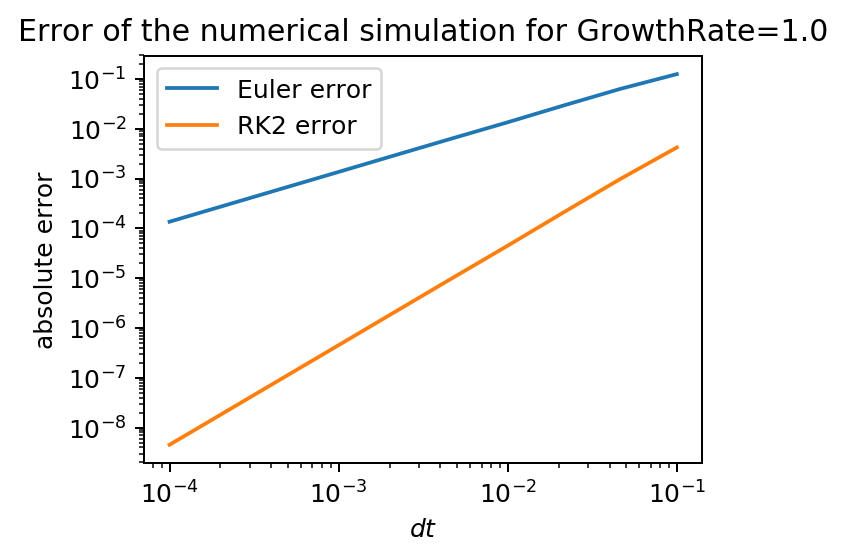

In [61]:
SimulationTime = 1.0            # maximum time of the solution
P0 = 1.0                        # initial population size
GrowthRate = 1.0                # maximum growth rate of the population

dt = np.logspace(-1, -4, 10)          # different values of dt to explore
print('The following values of dt will be tested: ' + str(dt) + '.')
PopulationE = np.zeros(dt.size)       # initializing for the final value of the Euler solver at different dt
PopulationRK2 = np.zeros(dt.size)     # same for the RK2 solve
t_end = np.zeros(dt.size)             # note that because dt is not an integer fraction of SimulationTime,
                                      # runs at different dt may end at slightly different final times. So 
                                      # we need to record the end times of all of these runs

for i in range(dt.size):        # loop over different dt values
    # solving with Euler at a given dt
    t, P = EulerArg(MalthusParam, 0.0, P0, SimulationTime, dt[i], (GrowthRate,)) 
    # recording the final population size
    PopulationE[i] = P[-1]
    # and now the same using RK2
    t, P = RK2Arg(MalthusParam, 0.0, P0, SimulationTime, dt[i], (GrowthRate,))
    PopulationRK2[i] = P[-1]
    # and recording the end time of the simulation
    t_end[i] = t[-1]

# what are the errors of the Euler and the RK2 solver? We compare to the exponential solution
PopErrorE = PopulationE - P0*np.exp(GrowthRate*t_end)
PopErrorRK2 = PopulationRK2 - P0*np.exp(GrowthRate*t_end)

# settig up the plotting, as in the previous figure
fig, ax = plt.subplots(figsize=(4, 3), dpi= 180, facecolor='w', edgecolor='k')
plt.loglog(dt, np.abs(PopErrorE),label='Euler error')    # plotting Euler method error
plt.loglog(dt, np.abs(PopErrorRK2), label='RK2 error')   # same for RK2
# adding legend, title, labels...
plt.legend()
plt.title('Error of the numerical simulation for GrowthRate=' + str(GrowthRate))
plt.xlabel('$dt$')
plt.ylabel('absolute error')
plt.show()

Explore the figure above. The error of the Euler method at $dt=10^{-4}$ is about $10^{-4}$, while it is $10^{-8}$ fot the RK2 method, showing that this is, indeed, a method quadratic in $dt$.

If a single round of prediction-correction allows us to improve the accuracy so dramatically, maybe a few rounds would be even better? To achieve the same accuracy of $10^{-6}$, a linear method would require $\sim 10^6$ steps, where each step involves one evaluation of the derivative. A quadratic method would require $\sim 10^3$ steps, where each steps involves two evaluations -- a drastic speedup! A cubic method would do the same with $10^2$ steps, wach with three evaluations. And a sixth order method would achieve the same with just 10 steps, each with six evaluations. Note, that while going from order 1 to 2 improved the speed by a factor of 1000 in this example, going from order 2 to 3 only improved the speed by an additional factor of 10. And to get one more factor of 10 required increasing the order from 3 to 6. That is, at some point, increased complexity of the algorithm is not really worth the speedup. Note also that, for an algorithm to be of, say, the second order requires the second derivative of the function $n(t)$ actually to exist! And this is not always a given. Thus increasing complexity may result in algorithms that start behaving erratically when equations we are solving are discontinuouso or not smooth. As a result, for typical problems that we will be faced with, algorithms of the 4th order are usually optimal in being fast enough, but also not too complex.

## Errors in computational modeling

Can we compensate the deficiency of the Euler method compared to RK2 by making $dt$ very small? Certainly, the computer will run for a very long time if it needs to make many millions of steps. But, at least, can we expect that the accuracy would be restored? Not so fast. It turns that every step can introduce a small error in the computation, and errors accumulate, so that decreasing $dt$ beyond some point is not really useful. To understand this, let's talk in more details about errors in the modeling process. 

Errors are everywhere! We have mentioned earlier the Mars Climate Orbiter that crashed due to an error in the unit conversion. While possible, such errors are maybe not the most common (and definitely avoidable). However, the computational modeling process involves also other types of errors, some of them simply unavoidable. Generally speaking, the errors in the modeling process can be classificed in the following way.


### Modeling errors
Incorrectly constructed model. This can include rather sophisticated errors, such as making wrong assumptions about importance of various effects. Or the errors can be trivial, like simply writing down a wrong form of a interaction law. To find these errors, one must verify the program -- line by line, but also, more crucially, using special simple cases, at least one per independent parameter.

### Implementation (coding) errors
Some of these may be notices simply -- like syntactic errors that the interpreter will pick for you. Some may be more complicated and involve incorrect logic (e.g., not initializing variables), and such mistakes are very hard to detect. As above, the only way of doing this is by verifying your program again and again with different parameter values.

### Data errors
These are often outside of your control: instruments can have errors, parameter values you read in the literature can have errors, data may be copied with errors, etc. While outside of our control, detecting such errors is also important. Check -- does the data make sense? Is it of correct sign? Of correct magnitude? Does it change in the right fashion? etc.

### Arithmetic errors
To understand how these emerge, we need first to understand how real numbers are stored in computer memory. In Python, you can find the functions needed to check how numbers are represented in the module sys.

In [22]:
import sys      # Note the new module!

>### Your turn 3.8
Run `dir(sys)` and `help(sys)` and explore the obkects available in the module.

Real numbers have infinitely many digits. But we can't store ifinitely mahy digits on a digital computer with fnite memory -- and so the numbers are represented by what we call a *floating point* number -- basically a real number written in a scientific notation, using base 2 instead of 10, and trucated after a fixed number of digits. The exponent of the scientific notation is called the *exponent*, while the significant digits are called the *mantissa*.  In general, *precision* of a floating point number is the number of significant digits in its mantissa. 

When we store the number in memory, we have to agree what is stored first: the sign, the exponent, or the mantissa. And within the exponent or the mantissa, we need to agree if we store the most significant bytes first and the least significant last, or the other way around. By analogy with the Little-endians vs the Big-endians conflict in the __[Gulliver's Tavels](https://en.wikipedia.org/wiki/Gulliver%27s_Travels)__ book, the decision of how to represent a floating point number is known as __[Endianness](https://en.wikipedia.org/wiki/Endianness)__, and different computer architectures do this differently. 

>### Your turn 3.9
Use `sys.byteorder` to verify whether your machine is little or big endian.

Luckily, for most applications, it's not important for you to know if your computer is little or big endian. Data written in files will have a flag indicating endiannes, and when you load data, Python will automatically convert it to the correct structure for your machine. And yet, once in a while problems due to mismatched endianness still emerge.

*Single precision* floating point number occupies 32 bits (4 bytes), and *double precision* 64 bits (8 bytes). Essentially all numerical computations we do with Python are with double precision numbers. Double precision number properties can can be found in `sys.foat_info`:

In [24]:
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In the case of my laptop, we see that the maximum binary exponent is 1024 -- or ten bits --  so that the largest number we can write is ${\rm mantissa}\times 2^{1024}$. This corresponds to the largest number of about ${\rm mantissa}\times 10^{308}$, or, when the entire mantissa is full of binary ones, to $1.7976931348623157\times 10^{308}$. Note that mantissa has `mant_dig=53` binary digits. Fifty three bits for mantissa, ten for the exponent, and one for the sign gives sixty four, as expected.
 
Similarly, you can read off above the minimum number and the exponent of the minimum positive number you can keep in memory. The largest and the smallest numbers are almost equal to the inverses of each other, but not quite. This is because coversion from binary to deciman numbers introduces mismatches.  

>### Your turn 3.10
What are the largest and the smallest positive numbers available on your computer?

You can read a lot more about the standard format  for storing floating point numbers in this __[Wikipedia article](https://en.wikipedia.org/wiki/IEEE_754-1985)__.  


#### Relative error vs absolute error
To understand the effects of arithmetic errors introduced by the floating point representation, or the approximate nature of various computational algorithms, we need to definte two different error measures. Suppose the correct answer is $x_{\rm true}$, while the answer that our computation produced is $x$. Then the *absolute* error is just the absolute value of the difference between the two, $\epsilon_{\rm abs} = |x_{\rm true}-x|$. The units of the error are the same units as those of $x$. The relative error is the absolute error measured as a fraction of the true answer, $\epsilon_{\rm rel}=\left|\frac{x_{\rm true}-x}{x_{\rm true}}\right|
\approx \left|\frac{x_{\rm true}-x}{x}\right|$. Here the approximate equality becomes accurate when the relative error is small, and inaccurate if it is close to 1 -- and especially inaccurate if either $x$ or $x_{\rm true}$ is close to 0.



#### Types of arithmetic errors
Now we are in a position to analyze numerical errors that emerge when doing operations with floating point numbers, and to characterize the relative or the absolute magnitudes of these errors

- *Round-off* or *truncation* error. When adding numbers together, or subtracting them, they must have the same exponent, and the computer processor will transofrm them into this form. But then part of the new mantissa may not fit, and will be truncated. Indeed, let's suppose that our mantissa has 3 significant decimal difits and add two numbers $1.23\times 10^0$ and $4.56\times 10^{-1}$. First the two numbers will be represented with the equal exponent of $10^0$ as $1.23\times 10^0$ and $0.456\times 10^{0}$. Adding the two will give $1.686\times 10^0$. Only the first three digits can be stored in our 3-digit decimal floating point number, and the last significant digit is then truncated, resulting in an arithmetic mistake $1.23\times 10^0+4.56\times 10^{-1}\approx 1.68\times 10^0$. More generally, a *truncation* error results when, in a computation, mantissa becomes longer than can be stored in a floating point number and has to be truncated. Note that, in our example, the absolute error of the truncation is $\epsilon_{\rm abs} = 0.006$ and the relative error is $\epsilon_{\rm rel}=4\times 10^{-3}$. If the exponets of the summands were both simultaneouly larger, say $10^2$ and $10^1$ instead of $10^1$ and $10^0$, the absolute error would be 10 times larger, but the relative error would remain the same. Thus trucation errors are always characterized by their relative effects. To understand the kind of truncation errors you expect on your computer, the `sys` module provides us with a variable called `epsilon` -- the smallest positive number you can add to 1.0 and still see the difference. It is equal to 1 in the least significant digit in the mantissa, while the exponent is 0. Note that truncation errors are very common and often devastating -- be on the lookout for them.
>### Your turn 3.11
Use `sys.float_info` and report `epsilon` for your computer.

Let's see, indeed, that `epsilon` can be added to 1.0 with an observable effect, but smaller numbers cannot be. Note also that `epsilon` is *not* the smallest number that can be represented in our computer. That is, adding `epsilon` to numbers larger than 1.0 may show no effect:

In [35]:
# epislon is the smallest possible number you can add to 1 an still see a difference
print('1.0 + epsilon = '+str(1+sys.float_info.epsilon))
print('1.0 + epsilon/2 = '+str(1+sys.float_info.epsilon/2))
print('10.0 + epsilon =' +str(10.0+sys.float_info.epsilon))

1.0 + epsilon = 1.0000000000000002
1.0 + epsilon/2 = 1.0
10.0 + epsilon =10.0


We can also see that `epsilon` is a measure of a relative (not absolute) error -- you can see a difference by adding $x\times \epsilon$ to any $x$, but adding a fraction of $x\times\epsilon$ won't be observable: 

In [37]:
print('1.0e3 + 1.0e3*epsilon = '+str(1e3+1e3*sys.float_info.epsilon))
print('1.0e3 + 1.0e3*epsilon/4 = ' +str(1e3+1e3*sys.float_info.epsilon/4))

1.0e3 + 1.0e3*epsilon = 1000.0000000000002
1.0e3 + 1.0e3*epsilon/4 = 1000.0


- *Overflow or underflow* error. Consider what happens when multiplying two numbers with a finite precision. Let's assume that our numbers have two decimal digits in the mantissa and only one in the exponent. Say, we want to multiply $5.5\times10^6$ by $4.4 \times 10^5$. The result is $24.2\times10^{11}$. First we see our old friend, the truncation error -- we need to tuncate $24.2\approx 2.4\times 10^1$. But another problem also shows up: the overall result is $2.4 \times 10^{12}$, which has an exponent that is larger than can be stored. This is an example of an *overflow* error. Similarly, when the exponent is smaller than the smallest one that can be stored, this results in the *underflow*. As a historican anecdote about the importance of such errors,  the first launch of __[ESA Ariane 5 rocket](https://en.wikipedia.org/wiki/Ariane_5)__ resulted in a self-destruction and a total loss of the mission due to, essentially, an overflow error. 

The largest and the smallest floating point numbers are handled differently in our computers. This is because, by convention, the minimum number is (binary) $1.00\dots0\times 2^{\rm min\_exp}$. Thus it can be further decreased up to $0.0\dots01\times2^{\rm min\_exp}$, but with a loss of accuracy. In contrast, the maximum number is (binary) $1.1\dots1\times 2^{\rm max\_exp}$, and it cannot be further increased.

In [46]:
print('Minimum double precision number: sys.float_info.min = ' + str(sys.float_info.min)+'.')
print('The number can be divided by 1e3: sys.float_info.min/1e3 = ' + str(sys.float_info.min/1e3))
print('    and by 1e13: sys.float_info.min/1e13 = ' + str(sys.float_info.min/1e13)+'.')
print('But dividing by 1e16 leads to underflow: sys.float_info.min/1e13 = ' + str(sys.float_info.min/1e16)+'.\n')

print('Maximum double precision number: sys.float_info.max = ' + str(sys.float_info.max)+'.')
print('Muiltiplying it by 1e3, 1e16, or even by (1+epsilon) all results in an overflow:')
print('    sys.float_info.max*(1+ sys.float_info.epsilon) = ' + str(sys.float_info.max*(1 + sys.float_info.epsilon)) + ';')
print('    sys.float_info.max*1e3 = ' + str(sys.float_info.max*1e3) + ';')
print('    sys.float_info.max*1e16 = ' + str(sys.float_info.max*1e16) + '.')

Minimum double precision number: sys.float_info.min = 2.2250738585072014e-308.
The number can be divided by 1e3: sys.float_info.min/1e3 = 2.225073858507e-311
    and by 1e13: sys.float_info.min/1e13 = 2.223e-321.
But dividing by 1e16 leads to underflow: sys.float_info.min/1e13 = 0.0.

Maximum double precision number: sys.float_info.max = 1.7976931348623157e+308.
Muiltiplying it by 1e3, 1e16, or even by (1+epsilon) all results in an overflow:
    sys.float_info.max*(1+ sys.float_info.epsilon) = inf;
    sys.float_info.max*1e3 = inf;
    sys.float_info.max*1e16 = inf.


### Good practice for avoiding arithmetic errors
- Don't add small numbers to large numbers. This decreases accuracy. Instead, when truncation error is a concern, sort the numbers from the smallest to the largest, and then add. This ensures that the small numbers have a chance to be accumulated together, before added to larger numbers. 
- How should divisions and multiplications be done? There's no one specific sequence, but there is one rule: avoid underflow or overflow. If you need to multiply and divide many numbers, make sure that your divisions and multiplications are ordered in such a way, that you don't get too large or too small numbers in the middle of the process.
- Don't do many additions when you can do just one multiplication. 
- In general, don't assume that distributive or associative properties are satisfied on a computer.
- Don't compare floating point numbers exactly. Compare them to a certain precision. Your work: write a function that compares if two floating point numbers are equal to a given relative precision (determined by the number with the smallest absolute value).

Below we illustrate some of these pitfalls in simple Python code. First, to show that it's important not to add small numbers to large ones, we create a large array of ones, with a single entry of 1e20 in it. Summing the array in the natural order completely neglects all the ones. However, sorting it, allows the ones to get accumulated to a number large enough to be visible on the background of 1e20.

In [54]:
x = np.ones(int(1e6))    # an array of a million ones
x[0] =  1e20
print('Summing the array in the natural order: ' + str(np.sum(x)) + '.') 
print('Summing the sorted array: ' + str(np.sum(np.sort(x))) + '.')

Summing the array in the natural order: 1e+20.
Summing the sorted array: 1.00000000000001e+20.


Second, we see below that, because of rounding/truncation errors, the numbers you generate usually are not what they should be exactly. Thus comparing your results to floating point expectations rarely works 

In [58]:
x = 0.002*np.ones(3000)
y = np.sum(x)
print('Sum of an array of 3000 entries of 0.002, which should be 6.0: ' + str(y) + '.')
print('Is the sum equal to 6.0? ' + str(y==6.0) + '!')

Sum of an array of 3000 entries of 0.002, which should be 6.0: 6.000000000000002.
Is the sum equal to 6.0? False!


>### Your turn 3.12
Find examples (which will involve very large, very small, or relatively small numbers) the violate the distributive property of addition/multiplication.

>### Your turn 3.13 
Write a function that will compare if two floating point numbers are equal to some relative or absolute precision.


## Solving systems of ODEs

Only the simplest systems have their state specified by a single dynamical variable, $n$ in the context of our simple Malthusian population model. Usually one deals with *systems* of a handful of interacting variables, which in our case becomes a system of ordinary differential equations. Let's introduce a classic example of a system of two nonlinearly interacting variables, and see how we need to change our integrator functions to accommodate such systems.

### Lotka-Volterra predator-prey model
We consider a prey animal species $x$, which grows exponentially if left alone, but at the same time it's preyed upon by a predator species, denoted by $y$. The dynamics of the number (or number density) of the prey is 
$$\frac{dx}{dt}=rx - \alpha xy,$$
where the second term denotes the capture of the prey. Indeed, the more prey animals there are, the easier it is to capture them, and the more predators there are, the more prey they will capture, resulting in the bilinear form $\alpha x y$ of the interaction term. The minus sign in front of the term indicates that the prey are getting killed, and not born, in this interaction. At the same time, when the predators eat, they have enough food to procreate -- but usually killing one prey only produces fewer than one predator. Further, predators also die a natural death. As a result, the dynamics of the number (or the number density) of the predators is 
$$\frac{dy}{dt}= \beta xy - d y,$$ 
where $\beta<\alpha$ is the birth rate of the predator, and $d$ is the death rate (the number of predators to die of natural causes is proportional to how many of them there are). 

This is an interesting dynamical system that exhibits oscillations. Indeed, first the number of prey animals goes up, and they become abundant. The predators feast on them, and it leads to the growth of the number of predators. As the number of predators grows, they need to eat more and more to sustain their population. This collapses the population of prey, which rapidly decreases. In turn, this makes predators go hungry, as there's now an insufficient number of prey to support them, and so the predator population collapses as well. The whole cycle restarts with the renewed growth of prey at that point. 

The predator-prey model of population dynamics has a __[rich history](https://en.wikipedia.org/wiki/Lotka–Volterra_equations)__, going back to oscillations in the number (and price) of furs of hare and lynx sold by trappers to the Hudson Bay company in the second half of the 19th century. It's fulfilling to see how some of the abstract models we write down come from the very real life.


### Model analysis  and Implementation
I will group these things together for the sake of brevity (you should not do this in your reports). We notice that this is a dynamical, continuous state, continuous time problem, where the state space consists of two variables $x$ and $y$. To solve the system of the two differential equations we introduced, we would need to update our Euler and RK2 integrators to be able to solve such *systems*. 

Below we implement these two solvers, based on the simple solvers above. There are a few differences. First, at every point, we need to evaluate arrays of derivatives, arrays of predictions, arrays of corrections, etc. Second, we restructure the arguments list to the integrators somewhat, and, instead of the initial time, integration time, and the step size, we pass all the time points, at which the solution must be evaluated. We do this because there is a built-in ODE integrator in one of the standard Python modules, `odeint()`, in the standard Python for scientific computing module `scipy`; see Sections 6.8.2 and 6.8.3 in the *Student Guide*. We would like to use this integrator in the future as well -- and we would like to have the same notation for our integrator and the standard one. 

In [96]:
def EulerSystemArg(xPrime, x0, t, args=()):
    """
    Solves a system of ODEs using the Euler method. 
    Allows passing arguments to the function being integrated.

    Usage:
        x = EulerSystemArg(xPrime, x0, t, args=()):
    
        
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated; should return 
            a 1d numpy array of derivatives 
        x0 -- intitial condition for x; should be a 1-d numpy array of the same dimensions as the 
            return value of xPrime()
        t -- time points, at which the value of the solution is needed, should be a 1-d numpy array
        args=() -- tuple of arguments to be passes to the xPrime function 
        
        result -- 2-d numpy array of values of the solution vector at every requested time point
        
    The function does not check for whether the dimensionality of x0 and the return argument of xPrime()
    match, and the function will fail if they don't.
    """
    
    x  = np.zeros((t.size, x0.size))  # initiatize the array of results at requested time points
    dt = np.diff(t)                   # time steps
    x[0,:] = x0                       # set the initial conditions
    
    for i in range(1, t.size):        # Loop over all time points
        x[i,:] = x[i-1,:] + dt[i-1] * xPrime(x[i-1,:],t[i-1],*args) # forward Euler step

    return x



def RK2SystemArg(xPrime, x0, t, args=()):
    """
    Solves a system of ODEs using the Runge-Kutta second order (RK2) method. 
    Allows passing arguments to the function being integrated.

    Usage:
        (t,x) = (xPrime, x0, t, args=()):
    
        
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated; should return 
            a 1d numpy array of derivatives 
        x0 -- intitial condition for x; should be a 1-d numpy array of the same dimensions as the 
            return value of xPrime()
        t -- time points, at which the value of the solution is needed, should be a 1-d numpy array
        args=() -- tuple of arguments to be passes to the xPrime function 
        
        result -- 2-d numpy array of values of the solution vector at every requested time point
        
    The function does not check for whether the dimensionality of x0 and the return argument of xPrime()
    match, and the function will fail if they don't.
    """
    
    x  = np.zeros((t.size, x0.size))  # initiatize the array of results at requested time points
    dt = np.diff(t)                   # time steps
    x[0,:] = x0                       # set the initial conditions

    for i in range(1, t.size):        # Loop over all time steps
        der = xPrime(x[i-1,:], t[i-1], *args)        # current derivative
        pred = x[i-1,:] + dt[i-1] * der              # predicted variable value
        pred_der = xPrime(pred, t[i], *args)         # predicted future derivative
        x[i,:] = x[i-1,:]+0.5*(der+pred_der)*dt[i-1] # corrected variable value

    return x

In [97]:
def PredatorPrey(Population, t, r, a, b, d):
    """
    this function returns the growth rate of two populations in the Predator-Prey model as a numpy array
    
    PredatorPrey(Population, t, args):

        Population -- an array of 2 numbers -- predator and prey current population sizes
        t -- time, unused
        (r, a, b, d) - the parameters of the population dynamics as described in the lecture
    """
    
    dx = Population[0]*(r-a*Population[1])
    dy = Population[1]*(b*Population[0]-d)
    
    return np.array((dx,dy))

Euler took 0.016956090927124023s to run.
RK2 took 0.02878594398498535s to run.
odeint took 0.00847315788269043s to run.


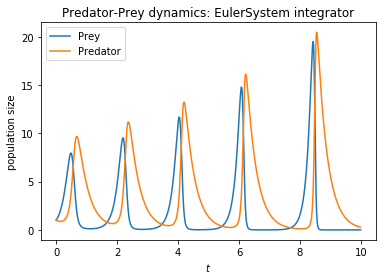

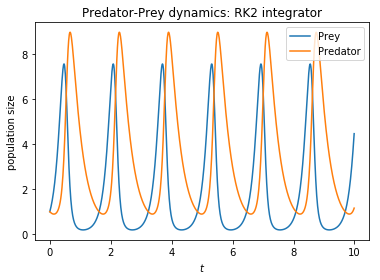

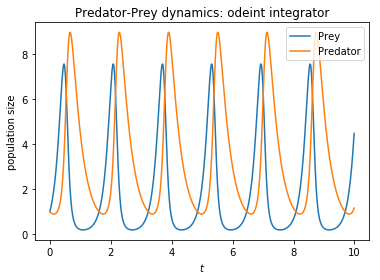

In [101]:
from scipy.integrate import odeint   # note a new module
import time

dt = 1e-2 # time step
SimulationTime = 10.0 # time to solve for
P0 = np.array((1,1))  # initial population size
r = 7.0 # intitalization of the 4 parameters
a = 2.0
b = 1.5
d = 3.0   

t=np.arange(0,SimulationTime,dt)

tt1 = time.time() # initial time
PEuler = EulerSystemArg(PredatorPrey, P0, t, args=(r,a,b,d))
tt2 = time.time() # time after euler
PRK2 = RK2SystemArg(PredatorPrey, P0, t, args=(r,a,b,d))
tt3 = time.time() # time after odeint
POdeInt = odeint(PredatorPrey, P0, t, args=(r,a,b,d))
tt4 = time.time() # time after odeint

print('Euler took ', tt2-tt1, 's to run.', sep='' )
print('RK2 took ', tt3-tt2, 's to run.', sep='' )
print('odeint took ', tt4-tt3, 's to run.', sep='' )


plt.plot(t, PEuler[:,0],label='Prey')
plt.plot(t, PEuler[:,1],label='Predator')
plt.legend()
plt.title('Predator-Prey dynamics: EulerSystem integrator')
plt.xlabel('$t$')
plt.ylabel('population size')
plt.show()

plt.plot(t, PRK2[:,0],label='Prey')
plt.plot(t, PRK2[:,1],label='Predator')
plt.legend()
plt.title('Predator-Prey dynamics: RK2 integrator')
plt.xlabel('$t$')
plt.ylabel('population size')
plt.show()

plt.plot(t, POdeInt[:,0],label='Prey')
plt.plot(t, POdeInt[:,1],label='Predator')
plt.legend()
plt.title('Predator-Prey dynamics: odeint integrator')
plt.xlabel('$t$')
plt.ylabel('population size')
plt.show()



### Model verification
Note that oscillations are always around the same point, and we can calculate it by setting the value of derivative to zero in the dynamical equations, which gives <math>x=d/\beta,\,y=r/\alpha</math>. One can thus verify our code by first setting the initial conditions exactly at this ''fixed point'', and then varying conditions and seeing that the fluctuations are always around the fixed point.